In [23]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the dataset
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [24]:
#converting y to 2D array and print
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [25]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [26]:
#training the svr model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [27]:
#predicting the new result
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

In [ ]:
#visualising the svr results

In [ ]:
#visualising the svr results for higher resolution and smoother curve

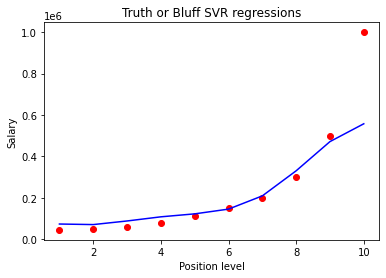

In [38]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color = 'blue')
plt.title('Truth or Bluff SVR regressions')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

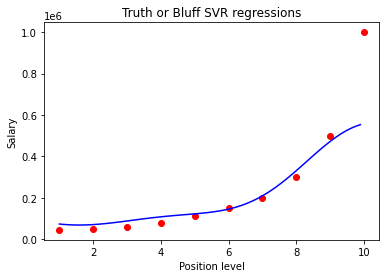

In [43]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))),color = 'blue')
plt.title('Truth or Bluff SVR regressions')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()